In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs

In [81]:
class LogisticRegressionClassifier:
    def __init__(self,lr=0.01,epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self,X,y):
        X = np.column_stack((X,np.ones(shape = (X.shape[0],1))))
        self.th,self.errorGD = self.gradientDescent(X,y,self.lr,self.epochs)

    def predict(self,t):
        t = np.column_stack((t,np.ones(shape = (t.shape[0],1))))
        y_pred = self.hypothesis(t,self.th)
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred.astype('int32')

    def predict_a(self,t,th):
        y_pred = self.hypothesis(t,th)
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred.astype('int32')
        
    def hypothesis(self,x,th):
        # y_pred = np.zeros((x.shape[0],))
        # for i in range(len(x)):
        #     y_pred[i] = np.sum(x[i]*th)
        # return y_pred
    
        # return np.sum(x*th,axis = 1)
    
        return 1/(1+np.exp(-1*(th@x.T)))
    
    def error(self,x,th,y):
        y_pred = self.hypothesis(x,th)
        return -1*(y*np.log2(y_pred) + (1-y)*np.log2(1-y_pred)).sum()
    
    def gradientDescent(self,x,y,lr=0.01,epochs = 1000):
        th = np.zeros(x.shape[1])
        # print(th1,th0)
        errorGD = []
        for i in range(epochs+1):
            y_pred = self.hypothesis(x,th)
            # print(y_pred)
            #Gradient
            gradients = ((y_pred-y)@x)
            th = th - lr*gradients
    
            errorGD.append(self.error(x,th,y))
            # if i%1000 == 0:
            print(f"Epoch: {i+1}, Error: {errorGD[-1]}, accuracy score{self.acc_score(y,self.predict_a(x,th))}")
    
        return th,errorGD
    
    def acc_score(self,y_true,y_pred):
        return np.mean(y_true == y_pred)
    


In [82]:
X,y = make_classification(n_samples=500,n_features=2,n_informative=2,n_redundant=0,n_classes=2,random_state=42)

In [83]:
X = (X-X.mean(axis=0))/X.std(axis=0)

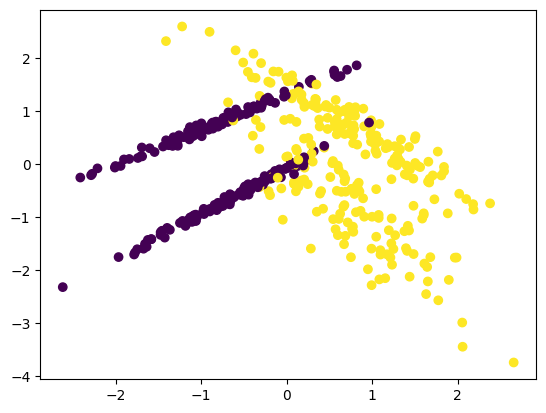

In [84]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [85]:
clf = LogisticRegressionClassifier(lr = 0.01,epochs=100)
clf.fit(X,y)
# clf.predict(X)

Epoch: 1, Error: 238.50005406879157, accuracy score0.88
Epoch: 2, Error: 222.28872666423663, accuracy score0.884
Epoch: 3, Error: 215.05993258263572, accuracy score0.888
Epoch: 4, Error: 210.96538816599266, accuracy score0.888
Epoch: 5, Error: 208.40679834385895, accuracy score0.888
Epoch: 6, Error: 206.7101630900053, accuracy score0.89
Epoch: 7, Error: 205.53867159545342, accuracy score0.89
Epoch: 8, Error: 204.70565999681912, accuracy score0.89
Epoch: 9, Error: 204.09997960131398, accuracy score0.89
Epoch: 10, Error: 203.6518423720355, accuracy score0.89
Epoch: 11, Error: 203.31560447191316, accuracy score0.89
Epoch: 12, Error: 203.06043239521284, accuracy score0.89
Epoch: 13, Error: 202.864945104935, accuracy score0.89
Epoch: 14, Error: 202.71399332719298, accuracy score0.89
Epoch: 15, Error: 202.59664848082645, accuracy score0.89
Epoch: 16, Error: 202.50490624185818, accuracy score0.89
Epoch: 17, Error: 202.43282785008637, accuracy score0.89
Epoch: 18, Error: 202.37595797133653, ac

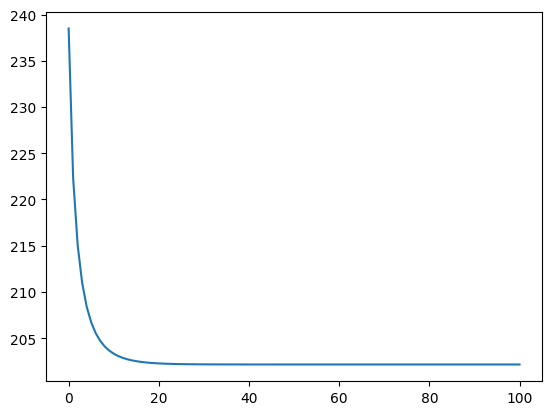

In [86]:
plt.plot(clf.errorGD)
plt.show()

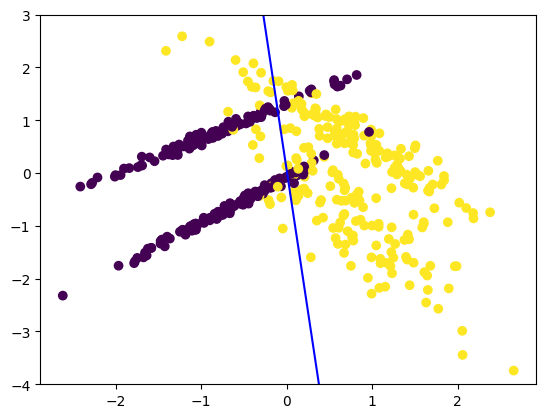

In [89]:
X1 = np.linspace(-2,2,100)
X2 = -1*([clf.th[0]/clf.th[1]]*X1+[clf.th[2]/clf.th[1]])
plt.plot(X1,X2,c='b')
plt.scatter(X[:,0],X[:,1],c=y)
plt.ylim(-4,3)
plt.show()